# 二値分類器へのポイズニング攻撃

## データセットの準備
200個のサンプルを持つ2つの特徴があるデータセット<br>
訓練用データ：前半100個<br>
テストデータ：後半100個（分類器の汎用性を測る）

In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
%matplotlib inline

In [2]:
X, y = make_classification(n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    weights=[.5, .5],
    random_state=17)

MLP(多層パーセプトロン）を使い分類をする。<br>
<img src="http://www.brain.kyutech.ac.jp/~furukawa/data/img/bp/bp_02.jpg" width="500">

In [3]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter=600, random_state=123).fit(X[:100], y[:100])

## データ可視化

Text(0.5,1,'テスト用データ')

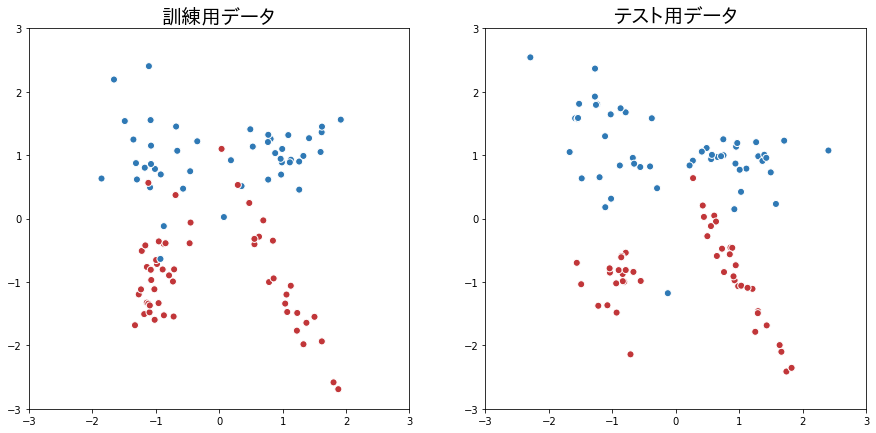

In [4]:
fontprop = matplotlib.font_manager.FontProperties(fname="/usr/share/fonts/truetype/fonts-japanese-gothic.ttf")

fig = plt.figure(figsize=(15,9))

ax1 = fig.add_subplot(121)
ax1.scatter(X[:100, 0], X[:100, 1], c=y[:100],s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax2 = fig.add_subplot(122)
ax2.scatter(X[100:, 0], X[100:, 1], c=y[100:],s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax1.set(aspect="equal",
       xlim=(-3, 3), ylim=(-3, 3))
ax2.set(aspect="equal",
       xlim=(-3, 3), ylim=(-3, 3))
ax1.set_title(u"訓練用データ", fontdict = {"fontproperties": fontprop, "fontsize": 20})
ax2.set_title(u"テスト用データ", fontdict = {"fontproperties": fontprop,  "fontsize": 20})

## 適合可視化

Text(0.5,1,'テスト用データ')

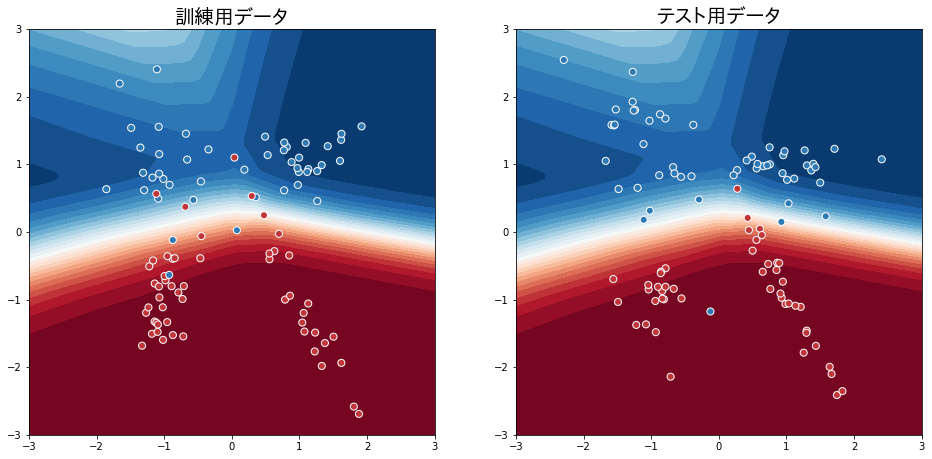

In [5]:
import mpl_toolkits.axes_grid1

xx, yy = np.mgrid[-3:3:.01,-3:3:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f =plt.figure(figsize=(16, 12))
ax1 = f.add_subplot(121)
contour1 = ax1.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax1.scatter(X[:100,0], X[:100, 1], c=y[:100], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax1.set(aspect="equal", xlim=(-3, 3), ylim=(-3, 3))
ax1.set_title(u"訓練用データ", fontdict = {"fontproperties": fontprop, "fontsize": 20})

ax2 = f.add_subplot(122)
contour2 = ax2.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax2.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax2.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax2.set(aspect="equal", xlim=(-3, 3), ylim=(-3, 3))
ax2.set_title(u"テスト用データ", fontdict = {"fontproperties": fontprop, "fontsize": 20})

# Plot the contour background
# ax_c = f.colorbar(contour1)
# ax_c.set_label("$P(y = 1)$")
# ax_c.set_ticks([0, .25, .5, .75, 1])

## 決定境界を明確化

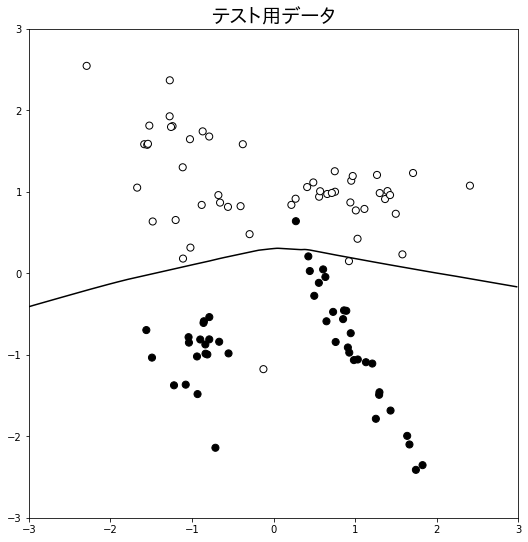

In [6]:
def plot_decision_boundary(X_orig, y_orig, probs_orig, chaff_X=None, chaff_y=None, probs_poisoned=None):
    f, ax = plt.subplots(figsize=(12, 9))

    ax.scatter(X_orig[100:,0], X_orig[100:, 1], 
               c=y_orig[100:], s=50, cmap="gray",
               edgecolor="black", linewidth=1)
    if all([(chaff_X is not None),
            (chaff_y is not None),
            (probs_poisoned is not None)]):
        ax.scatter(chaff_X[:,0], chaff_X[:, 1], 
                   c=chaff_y, s=50, cmap="gray", 
                   marker="*", edgecolor="black", linewidth=1)
        ax.contour(xx, yy, probs_orig, levels=[.5], 
                   cmap="gray", vmin=0, vmax=.8)
        ax.contour(xx, yy, probs_poisoned, levels=[.5], 
                   cmap="gray")
    elif all([(chaff_X is not None),(chaff_y is not None)]):
        ax.scatter(chaff_X[:,0], chaff_X[:, 1], 
                   c=chaff_y, s=50, cmap="gray", 
                   marker="*", edgecolor="black", linewidth=1)
        ax.contour(xx, yy, probs_orig, levels=[.5], cmap="gray")
    else:
        ax.contour(xx, yy, probs_orig, levels=[.5], cmap="gray")

    ax.set(aspect="equal", xlim=(-3, 3), ylim=(-3, 3))
    ax.set_title(u"テスト用データ", fontdict = {"fontproperties": fontprop, "fontsize": 20})
    
plot_decision_boundary(X, y, probs)

## **チャフ**を流し込む
チャフ＝モデルポイズニング攻撃攻撃トラフィック

チャフ：5個

In [7]:
num_chaff = 5
chaff_X = np.array([np.linspace(-2, -1, num_chaff), np.linspace(0.1, 0.1, num_chaff)]).T
chaff_y = np.ones(num_chaff)
print("チャフ:\n", chaff_X)

チャフ:
 [[-2.    0.1 ]
 [-1.75  0.1 ]
 [-1.5   0.1 ]
 [-1.25  0.1 ]
 [-1.    0.1 ]]


チャフポイント：★


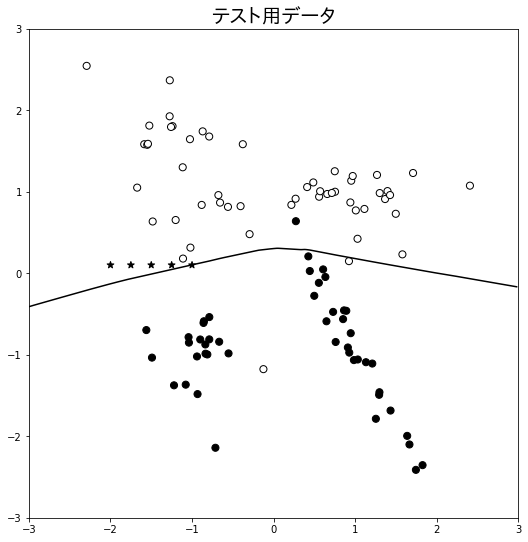

In [8]:
plot_decision_boundary(X, y, probs, chaff_X, chaff_y)
print('チャフポイント：★')

/home/takusub/.pyenv/versions/anaconda3-5.1.0/envs/TensorFlow/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):


チャフポイント：★
黒：新しい決定境界
グレー：古い決定境界


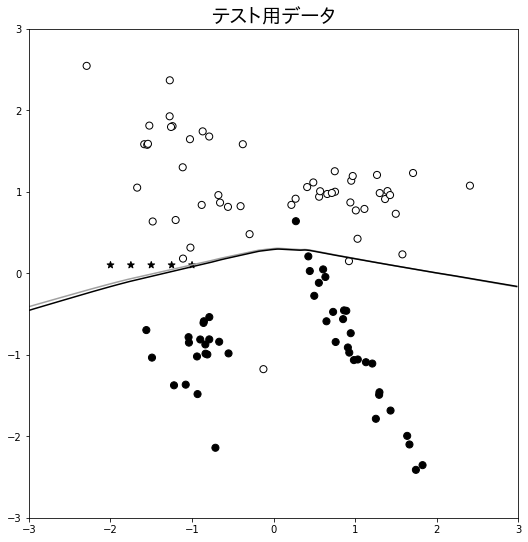

In [9]:
clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)
print('チャフポイント：★')
print('黒：新しい決定境界')
print('グレー：古い決定境界')